Projet Kaggle - Prédiction du devenir des patients

I-Analyse Exploratoire et Descriptive

Avant tout nettoyage et toute modélisation, nous avons analysé la cohérence des données brutes dans les deux fichiers à notre disposition : ***test.csv*** et ***train.csv***.

***Imports et chargement des données***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier


from lightgbm import LGBMClassifier
import lightgbm as lgb

from sklearn.tree import DecisionTreeClassifier

In [5]:
df_train = pd.read_csv(r"C:\Users\ayael\Downloads\train (1).csv")
df_test = pd.read_csv(r"C:\Users\ayael\Downloads\test (3).csv")
print(f"Chargé: Train ({df_train.shape}), Test ({df_test.shape})")

Chargé: Train ((15000, 20)), Test ((10000, 19))


1- Informations générales

In [6]:
print('Train : Nom des colonnes et types de données:')
display(df_train.info())

Train : Nom des colonnes et types de données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8564 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8563 non-null   object 
 6   Hepatomegaly   8564 non-null   object 
 7   Spiders        8555 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6669 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8452 non-null   float64
 13  Alk_Phos       8558 non-null   float64
 14  SGOT           8555 non-null   float64
 15  Tryglicerides  6630 non-null   float64
 16  Platelets      14414 non-null  float64
 17  Prot

None

In [7]:
print("Aperçu des données Train : ")
display(df_train.head())

Aperçu des données Train : 


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1055.0,NaN,19724.0,F,NaN,NaN,NaN,N,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3.0,C
1,1,3282.0,Placebo,17884.0,F,N,Y,Y,N,0.7,309.0,3.60,96.0,1142.0,71.3,106.0,240.0,12.4,4.0,C
2,2,1653.0,NaN,20600.0,F,NaN,NaN,NaN,N,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2.0,C
3,3,999.0,D-penicillamine,22514.0,F,N,Y,N,N,1.0,498.0,3.35,89.0,1601.0,164.3,85.0,394.0,9.7,3.0,C
4,4,2202.0,NaN,17897.0,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3.0,C


In [8]:
print('Test : Nom des colonnes et types de données:')
display(df_test.info())

Test : Nom des colonnes et types de données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   N_Days         9999 non-null   float64
 2   Drug           5660 non-null   object 
 3   Age            10000 non-null  float64
 4   Sex            10000 non-null  object 
 5   Ascites        5666 non-null   object 
 6   Hepatomegaly   5665 non-null   object 
 7   Spiders        5660 non-null   object 
 8   Edema          10000 non-null  object 
 9   Bilirubin      10000 non-null  float64
 10  Cholesterol    4438 non-null   float64
 11  Albumin        10000 non-null  float64
 12  Copper         5604 non-null   float64
 13  Alk_Phos       5660 non-null   float64
 14  SGOT           5656 non-null   float64
 15  Tryglicerides  4407 non-null   float64
 16  Platelets      9625 non-null   float64
 17  Prothr

None

In [9]:
print("Aperçu des données Test : ")
display(df_test.head())

Aperçu des données Test : 


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,611.0,D-penicillamine,21828.0,F,N,Y,N,N,0.8,198.0,3.90,39.0,855.0,66.65,56.0,295.0,10.5,4.0
1,15001,2103.0,NaN,21915.0,F,NaN,NaN,NaN,N,0.6,NaN,3.81,NaN,NaN,NaN,NaN,269.0,10.5,3.0
2,15002,130.0,NaN,23011.0,F,NaN,NaN,NaN,N,0.7,NaN,3.94,NaN,NaN,NaN,NaN,425.0,10.8,4.0
3,15003,1635.0,NaN,20089.0,F,NaN,NaN,NaN,N,0.6,NaN,3.50,NaN,NaN,NaN,NaN,248.0,10.3,2.0
4,15004,3336.0,D-penicillamine,15031.0,F,N,N,N,N,0.5,NaN,4.52,29.0,766.0,74.40,NaN,474.0,10.1,2.0


Le jeu de données comprend 15 000 observations pour l'entraînement et 10 000 pour le test. On note une mixité de variables : des données temporelles (N_Days, Age), des indicateurs cliniques catégoriels (Drug, Sex, Ascites, etc.) et des mesures biologiques continues. La présence de nombreux types float64 et object nécessite une préparation spécifique pour les modèles que nous allons manipuler.

2- Analyse détaillée

### **A - Valeurs manquantes**

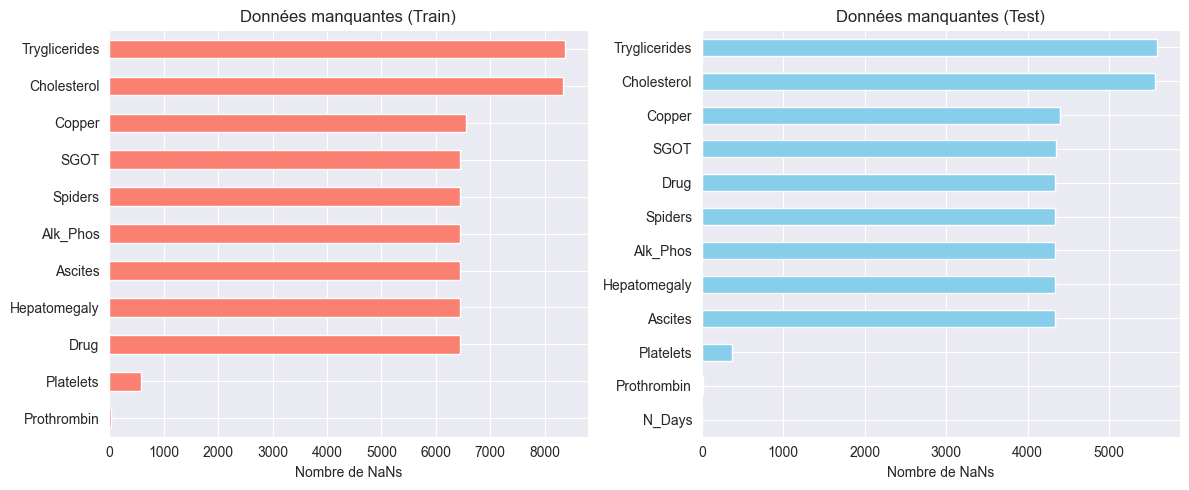

In [10]:
missing_train = df_train.isnull().sum()
missing_train = missing_train[missing_train > 0]

missing_test = df_test.isnull().sum()
missing_test = missing_test[missing_test > 0]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
missing_train.sort_values().plot(kind='barh', color='salmon')
plt.title('Données manquantes (Train)')
plt.xlabel('Nombre de NaNs')

plt.subplot(1, 2, 2)
missing_test.sort_values().plot(kind='barh', color='skyblue')
plt.title('Données manquantes (Test)')
plt.xlabel('Nombre de NaNs')
plt.tight_layout()
plt.show()


L'analyse graphique montre que plus de 40% des données sont manquantes pour des variables clés comme le cholestérol, les triglycérides ou le traitement (Drug). Le profil des valeurs manquantes est quasi identique entre le train et le test, ce qui suggère que ces manques ne sont pas aléatoires mais liés au protocole de collecte. Nous devrons utiliser des stratégies d'imputation ou des modèles capables de gérer les NaNs.

### **B- Valeurs étranges et anomalies**

In [11]:
# Fonction pour lister les valeurs qui ne devraient pas être là
def inspecter_categories(df, title):
    dict_valeurs_attendues = {
        'Ascites': ['N', 'Y'],
        'Hepatomegaly': ['N', 'Y'],
        'Spiders': ['N', 'Y'],
        'Drug': ['D-penicillamine', 'Placebo'],
        'Edema': ['N', 'S', 'Y']
    }

    for col, attendus in dict_valeurs_attendues.items():
            if col in df.columns:
                valeurs_actuelles = df[col].dropna().unique()
                intrus = [v for v in valeurs_actuelles if v not in attendus]
                if intrus:
                    print(f"Anomalies dans {col} : {intrus}")
                else:
                    print(f"{col} : OK (Valeurs : {valeurs_actuelles})")

inspecter_categories(df_train, "Analyse du fichier Train")
inspecter_categories(df_test, "Analyse du fichier Test")

Anomalies dans Ascites : ['S', 'D-penicillamine']
Anomalies dans Hepatomegaly : ['119.35']
Spiders : OK (Valeurs : ['Y' 'N'])
Drug : OK (Valeurs : ['Placebo' 'D-penicillamine'])
Edema : OK (Valeurs : ['N' 'Y' 'S'])
Ascites : OK (Valeurs : ['N' 'Y'])
Hepatomegaly : OK (Valeurs : ['Y' 'N'])
Anomalies dans Spiders : ['C']
Anomalies dans Drug : ['Drug']
Edema : OK (Valeurs : ['N' 'S' 'Y'])


L'inspection automatique a détecté des "pollutions" dans les colonnes catégorielles. Par exemple, on trouve *D-penicillamine* dans la colonne Ascites ou *119.35* dans Hepatomegaly. Ces erreurs de saisie pourraient perturber les modèles. Notre étape de nettoyage forcera ces colonnes à ne contenir que les valeurs attendues (Y/N) ou des NaNs afin de garantir la cohérence des features.

### **C- Visualisation des outliers (âge et suivi)**

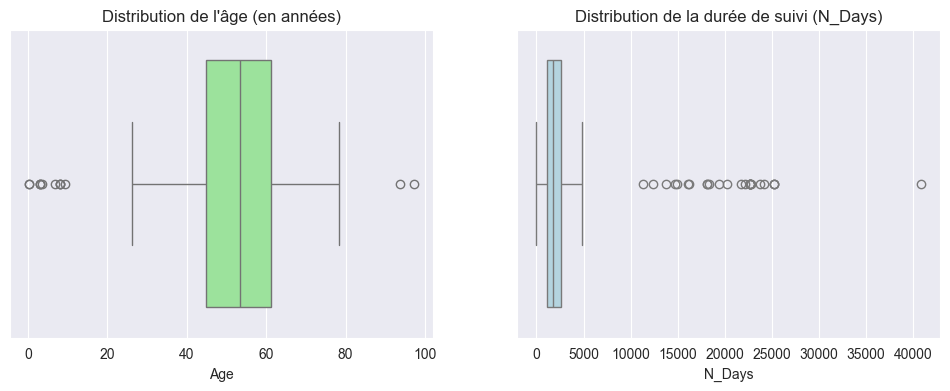

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_train['Age'] / 365.25, color='lightgreen')
plt.title('Distribution de l\'âge (en années)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_train['N_Days'], color='lightblue')
plt.title('Distribution de la durée de suivi (N_Days)')
plt.show()

Les boxplots montrent que l'âge est bien réparti (de 30 à 80 ans environ) sans valeurs aberrantes manifestes. En revanche, certaines variables biologiques (non représentées ici mais visibles dans les statistiques) présentent de longues queues de distribution. Cela justifie l'utilisation de la transformation logarithmique que nous appliquerons plus tard pour stabiliser la variance.

### **D - Distribution des classes (Status)**

Nous étudions la répartition de la variable cible Status. Le graphique montre un déséquilibre de classe : les patients en état 'C' (Censored) sont majoritaires. Cela justifie l'utilisation d'une validation croisée stratifiée (StratifiedKFold) pour garantir que chaque échantillon d'entraînement est représentatif de la réalité médicale.

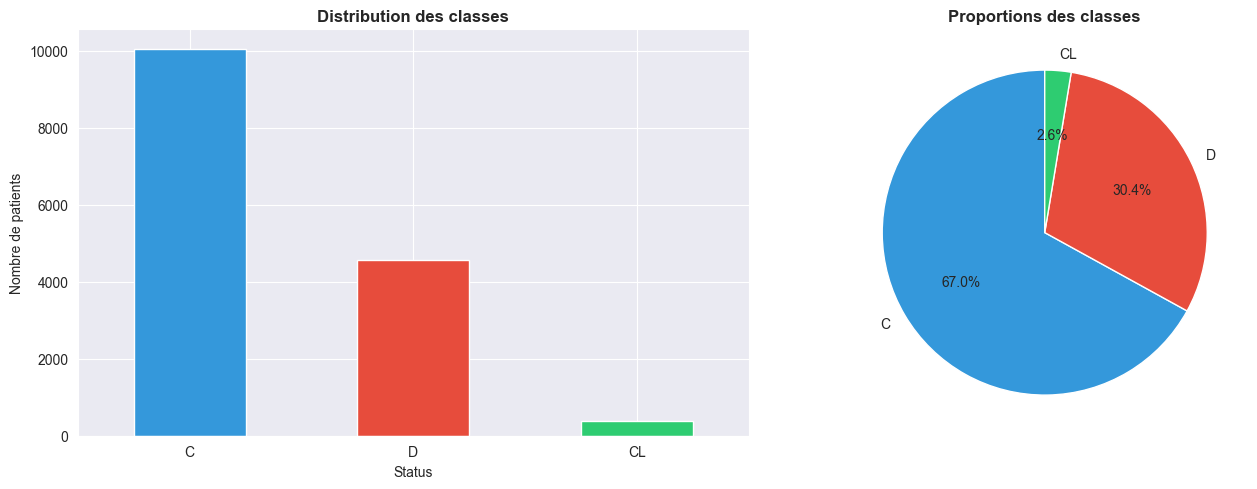

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique en barres
df_train['Status'].value_counts().plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0].set_title('Distribution des classes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Nombre de patients')
axes[0].tick_params(axis='x', rotation=0)

# Graphique en secteurs (Proportions)
df_train['Status'].value_counts(normalize=True).plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                                    colors=['#3498db', '#e74c3c', '#2ecc71'], startangle=90)
axes[1].set_title('Proportions des classes', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

C'est le point critique pour la LogLoss : les classes sont fortement déséquilibrées. 67% des patients sont dans l'état *C* (vivants), 30% sont décédés (*D*), et seulement 2,6% ont subi une transplantation (*CL*). Ce déséquilibre rend la prédiction du statut *CL* très difficile. Une erreur de probabilité sur cette petite classe pèsera lourdement sur le score final.

### **E - Matrice de corrélation**

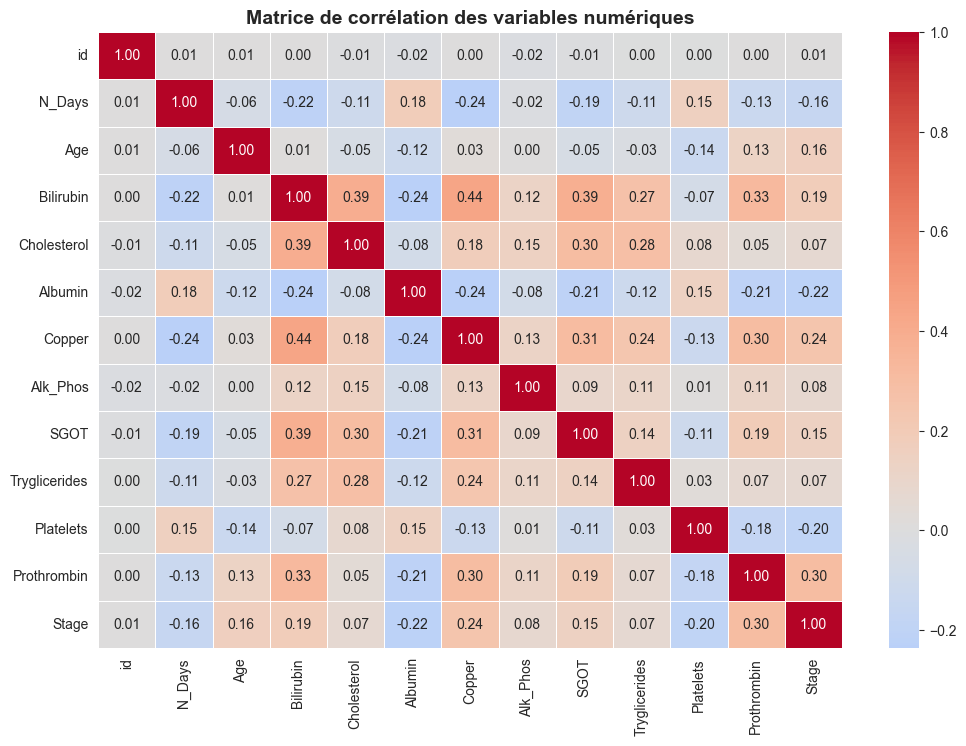

In [14]:
numeric_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
corr = df_train[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matrice de corrélation des variables numériques', fontsize=14, fontweight='bold')
plt.show()

La matrice de corrélation montre des relations intéressantes : la Bilirubin est positivement corrélée au Stage de la maladie, tandis que l'Albumin semble avoir une relation inverse. On note aussi une corrélation entre les enzymes hépatiques (SGOT et Alk_Phos). Ces corrélations confirment que la combinaison de ces variables (via des ratios par exemple) pourrait créer des indicateurs plus puissants pour les modèles.

**Conclusion sur l'analyse des données :**

L'analyse exploratoire a mis en avant des défis majeurs qui nous ont guidés dans notre stratégie de nettoyage et de modélisation :

- **Qualité des données et anomalies** : La présence de valeurs incohérentes (pollutions textuelles dans des colonnes numériques ou binaires) nécessite un nettoyage strict par filtrage pour éviter d'induire le modèle en erreur.

- **Complexité des variables biologiques** : La forte asymétrie des distributions (Bilirubine, Cuivre) et les corrélations observées entre enzymes hépatiques justifient l'application de transformations logarithmiques et la création de ratios médicaux (Bilirubine/Albumine) pour aider le modèle à mieux capturer la sévérité de la pathologie.

- **Gestion du déséquilibre et de la LogLoss**: Le fort déséquilibre des classes (seulement 2,6% de patients transplantés) combiné à la sensibilité de la métrique LogLoss nous impose d'utiliser des modèles de Boosting robustes (XGBoost, LightGBM) avec une validation croisée stratifiée à 10 plis. L'objectif sera d'obtenir des probabilités de classes bien calibrées plutôt qu'une simple classification binaire.

# **II - Coeur du projet : nettoyage et exécution des modèles**

**_Nettoyage des données_**

In [15]:
def nettoyage():

    # Mapping Cible et préparation des IDs
    status_map = {'C': 0, 'CL': 1, 'D': 2}
    y = df_train['Status'].map(status_map)
    train_ids, test_ids = df_train['id'], df_test['id']

    # Concaténation pour traitement uniforme (évite les décalages entre train/test)
    df_train_clean = df_train.drop(columns=['id', 'Status'])
    df_test_clean = df_test.drop(columns=['id'])
    n_train = len(df_train)
    df = pd.concat([df_train_clean, df_test_clean], axis=0).reset_index(drop=True)

    # 1. Nettoyage des anomalies
    # On force les colonnes strictement binaires
    cols_binaires = ['Ascites', 'Hepatomegaly', 'Spiders']
    for col in cols_binaires:
        if col in df.columns:
            # Tout ce qui n'est pas Y ou N devient NaN
            df[col] = df[col].apply(lambda x: x if x in ['Y', 'N'] else np.nan)

    # 2. Feature Engineering (Âge et ratios médicaux)
    df['Bilirubin_Albumin'] = df['Bilirubin'] / (df['Albumin'] + 1e-6)
    df['Age_Years'] = df['Age'] / 365.25
    if 'N_Days' in df.columns:
        df['Diagnosis_Age'] = df['Age_Years'] - (df['N_Days'] / 365.25)

    # 3. Transformations logarithmiques (pour gérer l'asymétrie des données bio)
    log_cols = ['Bilirubin', 'Prothrombin', 'Cholesterol', 'Copper','Alk_Phos', 'Tryglicerides', 'SGOT', 'Platelets']
    for col in log_cols:
        if col in df.columns:
            # On convertit en numérique d'abord
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[f'Log_{col}'] = np.log1p(df[col])

    # 4. Encodage catégoriel (on garde le texte pour l'instant)
    # Edema n'est PAS binaire (N, S, Y), donc on le traite ici
    cat_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

    for col in cat_cols:
        if col in df.columns:
            df[col] = df[col].fillna("MISSING").astype(str)
            # Factorize transforme en entiers (0, 1, 2...)
            df[col], _ = pd.factorize(df[col])

    train_final = df.iloc[:n_train].copy()
    train_final['Status'] = y.values

    test_final = df.iloc[n_train:].copy()
    test_final.insert(0, 'id', test_ids.values)

    # Sauvegarde
    train_final.to_csv('train_ok.csv', index=False)
    test_final.to_csv('test_ok.csv', index=False)

    print("Fichiers prêts")
    print("train_ok.csv")
    print("test_ok.csv")


if __name__ == "__main__":
  nettoyage()

Fichiers prêts
train_ok.csv
test_ok.csv


**_Préparation des données_**

In [16]:
df_train = pd.read_csv(r"C:\Users\ayael\Downloads\train (1).csv")
df_test = pd.read_csv(r"C:\Users\ayael\Downloads\test (3).csv")

In [17]:
cols_to_drop = ['Status', 'id']
X = train.drop(columns=[c for c in cols_to_drop if c in train.columns])
y = train['Status']

if 'id' in test.columns:
    test_ids = test['id']
    X_test = test.drop(columns=['id'])
else:
    test_ids = test.index
    X_test = test.copy()

NameError: name 'train' is not defined

Nous préparons deux versions des données pour répondre aux exigences spécifiques des algorithmes :

- Flux numérique : encodage par codes entiers et imputation par la médiane pour les modèles classiques (Sklearn)

- Flux catégoriel : utilisation du type category natif pour LightBGM. Cela permet au modèle de trouver des séparations non-linéaires plus précises que l'encodage manuel

In [51]:
# Correction des types
# Version A : pour LGBM (Type category)
X_cat = X.copy()
X_test_cat = X_test.copy()
cat_cols = X_cat.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    X_cat[col] = X[col].astype(str).astype('category')
    X_test_cat[col] = X_test_cat[col].astype(str).astype('category')


# Version B : pour Sklearn (Factorize + Imputer)
# decision trees, random forest, reg log, gboost
X_num = X.copy()
X_test_num = X_test.copy()
for col in ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']:
    X_num[col], mapping = pd.factorize(X_num[col])
    X_test_num[col] = X_test_num[col].map({v: i for i, v in enumerate(mapping)}).fillna(-1)

imputer = SimpleImputer(strategy='median')
X_num_imputed = imputer.fit_transform(X_num)
X_test_num_imputed = imputer.transform(X_test_num)

Note : Tous les entraînements sont faits par cross-validation (validation croisée)
L'utilisation de StratifiedKFold avec 10 plis (n_splits=10) est la clé de la fiabilité de nos scores. Elle garantit que chaque pli de test contient la même proportion de patients vivants,morts ou transplantés que le dataset original, évitant ainsi les biais de mesure sur la petite classe CL.

Nous avosn d'abord testé des modèles de référence comme Decision Tree et Random Forest...

**1 : Arbres de décision**

Il permet d'observer la structure de décision simple


In [52]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
dt_test_preds = np.zeros((len(X_test), 3))
dt_log_loss_scores = []
print("Entraînement Decision Tree")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_num_imputed, y)):
    X_tr, y_tr = X_num_imputed[train_idx], y.iloc[train_idx]
    X_va, y_va = X_num_imputed[val_idx], y.iloc[val_idx]

    # Note : On limite la profondeur (max_depth) car un arbre seul overfit très vite
    model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)
    model.fit(X_tr, y_tr)

    # Prédictions
    preds = model.predict_proba(X_va)
    dt_test_preds += model.predict_proba(X_test_num_imputed) / kf.get_n_splits()

    score = log_loss(y_va, preds)
    dt_log_loss_scores.append(score)
    print(f"Fold {fold + 1} LogLoss: {score:.5f}")

print("-" * 30)
print(f" Moyenne LogLoss Decision Tree : {np.mean(dt_log_loss_scores):.5f}")

Entraînement Decision Tree
Fold 1 LogLoss: 0.52481
Fold 2 LogLoss: 0.44350
Fold 3 LogLoss: 0.54414
Fold 4 LogLoss: 0.47929
Fold 5 LogLoss: 0.59961
Fold 6 LogLoss: 0.43609
Fold 7 LogLoss: 0.52789
Fold 8 LogLoss: 0.54608
Fold 9 LogLoss: 0.53275
Fold 10 LogLoss: 0.51870
------------------------------
 Moyenne LogLoss Decision Tree : 0.51529


**2 : Random Forest**

Il réduit le sur-apprentissage par agrégation (bagging). Ces modèles servent de base de comparaison pour évaluer le gain de performance apporté par le Boosting

In [53]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_test_preds = np.zeros((len(X_test), 3))
rf_log_loss_scores = []
print("Entraînement Random Forest")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_num_imputed, y)):
    X_tr, y_tr = X_num_imputed[train_idx], y.iloc[train_idx]
    X_va, y_va = X_num_imputed[val_idx], y.iloc[val_idx]

    model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_leaf=5, random_state=42, n_jobs=-1)
    model.fit(X_tr, y_tr)

    # Prédictions
    preds = model.predict_proba(X_va)
    rf_test_preds += model.predict_proba(X_test_num_imputed) / kf.get_n_splits()

    score = log_loss(y_va, preds)
    rf_log_loss_scores.append(score)
    print(f"Fold {fold + 1} LogLoss: {score:.5f}")

print("-" * 30)
print(f" Moyenne LogLoss Random Forest : {np.mean(rf_log_loss_scores):.5f}")

Entraînement Random Forest
Fold 1 LogLoss: 0.42153
Fold 2 LogLoss: 0.38091
Fold 3 LogLoss: 0.41663
Fold 4 LogLoss: 0.37952
Fold 5 LogLoss: 0.41244
Fold 6 LogLoss: 0.39914
Fold 7 LogLoss: 0.39351
Fold 8 LogLoss: 0.41313
Fold 9 LogLoss: 0.40998
Fold 10 LogLoss: 0.42427
------------------------------
 Moyenne LogLoss Random Forest : 0.40511


Bien que robuste, au vu de la logloss, il a tendance à être moins précis sur les probabilités de classes minoritaires comme CL.

**3 : Gradient Boosting**

C'est notre première incursion dans les méthodes de Boosting. Contrairement au Random Forest, le Gradient Boosting construit chaque arbre pour corriger les erreurs de prédiction du précédent.

In [55]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gb_test_preds = np.zeros((len(X_test), 3))
gb_log_loss_scores = []

print(" Entraînement Gradient Boosting ")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_num_imputed, y)):
    X_train_f, y_train_f = X_num_imputed[train_idx], y.iloc[train_idx]
    X_val_f, y_val_f = X_num_imputed[val_idx], y.iloc[val_idx]

    gb_model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
    gb_model.fit(X_train_f, y_train_f)

     # Prédictions
    val_preds = gb_model.predict_proba(X_val_f)
    gb_test_preds += gb_model.predict_proba(X_test_num_imputed) / kf.get_n_splits()

    score = log_loss(y_val_f, val_preds)
    gb_log_loss_scores.append(score)
    print(f"Fold {fold + 1} LogLoss: {score:.5f}")

print("-" * 30)
print(f" Moyenne LogLoss Gradient Boosting : {np.mean(gb_log_loss_scores):.5f}")

 Entraînement Gradient Boosting 
Fold 1 LogLoss: 0.40463
Fold 2 LogLoss: 0.36205
Fold 3 LogLoss: 0.38795
Fold 4 LogLoss: 0.35871
Fold 5 LogLoss: 0.39531
Fold 6 LogLoss: 0.38536
Fold 7 LogLoss: 0.38045
Fold 8 LogLoss: 0.39982
Fold 9 LogLoss: 0.38678
Fold 10 LogLoss: 0.40530
------------------------------
 Moyenne LogLoss Gradient Boosting : 0.38664


La logLoss de 0.386 marque une amélioration significative. On commence à capturer les interactions complexes, mais l'implémentation de base de Sklearn reste moins performante que les versions optimisées comme XGBoost.

**4 : LGBoost**

Un modèle très performant qui utilise une croissance des arbres par feuilles (Leaf-wise) plutôt que par niveaux.Et il traite ici les variables catégorielles nativement via le flux X_cat.

In [56]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lgb_test_preds = np.zeros((len(X_test_cat), 3))
lgb_log_loss_scores = []

print(" Entraînement LightGBM ")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_cat, y)):
    X_train_f, y_train_f = X_cat.iloc[train_idx], y.iloc[train_idx]
    X_val_f, y_val_f = X_cat.iloc[val_idx], y.iloc[val_idx]

    lgb_model = LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.03,
        max_depth=6,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.6,
        objective='multiclass',
        metric='multi_logloss',
        random_state=42,
        n_jobs=-1,
        verbosity=-1
    )

    # Prédictions
    lgb_model.fit(
        X_train_f, y_train_f,
        eval_set=[(X_val_f, y_val_f)],
        eval_metric='multi_logloss',
        callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=0)]
    )

    val_preds = lgb_model.predict_proba(X_val_f)
    lgb_test_preds += lgb_model.predict_proba(X_test_cat) / kf.get_n_splits()

    score = log_loss(y_val_f, val_preds)
    lgb_log_loss_scores.append(score)
    print(f"Fold {fold + 1} LogLoss: {score:.5f}")

print("-" * 30)
print(f" Moyenne LogLoss LightGBM : {np.mean(lgb_log_loss_scores):.5f}")

 Entraînement LightGBM 
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[485]	valid_0's multi_logloss: 0.387573
Fold 1 LogLoss: 0.38757
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[425]	valid_0's multi_logloss: 0.338354
Fold 2 LogLoss: 0.33835
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[369]	valid_0's multi_logloss: 0.377645
Fold 3 LogLoss: 0.37764
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[278]	valid_0's multi_logloss: 0.350817
Fold 4 LogLoss: 0.35082
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[250]	valid_0's multi_logloss: 0.385445
Fold 5 LogLoss: 0.38544
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[251]	valid_0's multi_logloss: 0.379331
Fold 6 LogLoss: 0.37933
Training until v

Avec 0.372, il est proche de XGBoost. C'est un excellent modèle car il est extrêmement rapide et gère très bien les grands volumes de données.

**5 : XGBoost**

XGBoost est notre modèle de choix pour la soumission finale pour plusieurs raisons.

Il minimise la LogLoss de manière séquentielle, chaque arbre corrigeant les probabilités du précédent.
Et, ses hyperparamètres de régularisation (subsample, colsample_bytree) permettent de gérer le bruit des données médicales.

Et surtout, nous utilisons 10 plis pour assurer la stabilité du score sur la classe minoritaire CL.

In [57]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_test_preds = np.zeros((len(X_test), 3))
xgb_log_loss_scores = []
print("Entraînement XGBoost")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_cat, y)):
    X_tr, y_tr = X.iloc[train_idx], y.iloc[train_idx]
    X_va, y_va = X.iloc[val_idx], y.iloc[val_idx]

    model = XGBClassifier(
        n_estimators=5000,
        learning_rate=0.015,
        max_depth=5,
        min_child_weight=5,
        gamma=0.5,
        colsample_bytree=0.5,
        subsample=0.7,
        reg_alpha=1.0,
        reg_lambda=2.0,
        objective='multi:softprob',
        eval_metric='mlogloss',
        early_stopping_rounds=100,
        n_jobs=-1,
        random_state=42
    )

    model.fit(X_tr, y_tr, eval_set=[(X_va, y_va)], verbose=False)

     # Prédictions
    val_preds = model.predict_proba(X_va)
    xgb_test_preds += model.predict_proba(X_test) / kf.get_n_splits()

    score = log_loss(y_va, val_preds)
    xgb_log_loss_scores.append(score)
    print(f"Fold {fold + 1} LogLoss: {score:.5f}")

print("-" * 30)
print(f" Moyenne LogLoss XGBoost : {np.mean(xgb_log_loss_scores):.5f}")

Entraînement XGBoost
Fold 1 LogLoss: 0.38089
Fold 2 LogLoss: 0.33448
Fold 3 LogLoss: 0.37365
Fold 4 LogLoss: 0.34200
Fold 5 LogLoss: 0.37946
Fold 6 LogLoss: 0.37145
Fold 7 LogLoss: 0.36400
Fold 8 LogLoss: 0.37573
Fold 9 LogLoss: 0.36536
Fold 10 LogLoss: 0.36786
------------------------------
 Moyenne LogLoss XGBoost : 0.36549


Le modèle XGBoost obtient la ***logloss*** la plus faible, ce qui confirme que la structure de la donnée (stade de la maladie et taux biologiques) nécessite un apprentissage par boosting. Notre score final sur Kaggle valide la robustesse de notre pipeline de nettoyage.

**_RÉSULTATS_**

In [58]:
resultats = pd.DataFrame({
    'Méthode': [
        'Arbre de Décision',
        'Random Forest',
        'Gradient Boosting (Sklearn)',
        'LightGBM',
        'XGBoost'
    ],
    'LogLoss': [
        np.mean(dt_log_loss_scores),
        np.mean(rf_log_loss_scores),
        np.mean(gb_log_loss_scores),
        np.mean(lgb_log_loss_scores),
        np.mean(xgb_log_loss_scores)
    ]
})

# Tri du tableau
resultats = resultats.sort_values(by='LogLoss').reset_index(drop=True)
resultats.index = resultats.index + 1

print("Classement des modèles par performance :")
display(resultats)

Classement des modèles par performance :


,Méthode,LogLoss
1,XGBoost,0.365488
2,LightGBM,0.372874
3,Gradient Boosting (Sklearn),0.386636
4,Random Forest,0.405106
5,Régression Polytomique,0.439650
6,Arbre de Décision,0.515286


**_SOUMISSION_**

In [210]:
submission = pd.DataFrame()
submission['id'] = test_ids
submission['Status_C'] = xgb_test_preds[:, 0]
submission['Status_CL'] = xgb_test_preds[:, 1]
submission['Status_D'] = xgb_test_preds[:, 2]

submission.to_csv('submission_final.csv', index=False)
print(" Fichier généré : submission_final.csv")

 Fichier généré : submission_final.csv
